New sample selection as of meeting discussion 29/04/2024:
- previous selection criteria based on poster from conference 
- needed to add a restriction on how close the planet orbits to its host star (i.e. semimajor orbital axis)
- remove restriction on mass (< 13 Jupiter masses) since we want to keep the heavier planets in our sample 

Thus the revised selection criteria are 
- distance <= 25 pc (since the poster from the conference analysed some systems further than 17.5pc)
- declination < +40 degrees to account for the range of ASKAP
- semi-major orbital axis <= 0.1 AU 

This produces a sample of 92 exoplanetary systems with 123 unique exoplanets. 

In [1]:
#New sample selection as of meeting discussion 29/04/2024 
import pandas as pd
import matplotlib.pyplot as plt
archive_full=pd.read_csv("NASA_exoplanet_archive_with_proper_motion.csv",sep=',',header=47,low_memory=False)

#Declination < +40 
new_archive_full=archive_full.dropna(subset=["dec"])
archive_full_filtered_declination=new_archive_full.drop(new_archive_full[new_archive_full["dec"] > 40].index)

#Distance to Earth <= 25 pc
sy_dist=archive_full_filtered_declination.dropna(subset=["sy_dist"])
sy_dist_filtered=sy_dist.drop(sy_dist[sy_dist["sy_dist"] > 25].index)

#Semi-major axis <= 0.1 AU
semimajor_axis = sy_dist_filtered.dropna(subset = 'pl_orbsmax')
semimajor_axis_filtered = semimajor_axis.drop(semimajor_axis[semimajor_axis["pl_orbsmax"] > 0.1].index)

len(semimajor_axis_filtered["hostname"].unique())
len(semimajor_axis_filtered["pl_name"].unique())

semimajor_axis_filtered.to_csv('Hot_Jupiters_123_Samples.csv')

Updating summary plots based on this new sample selection and feedback in the meeting. 

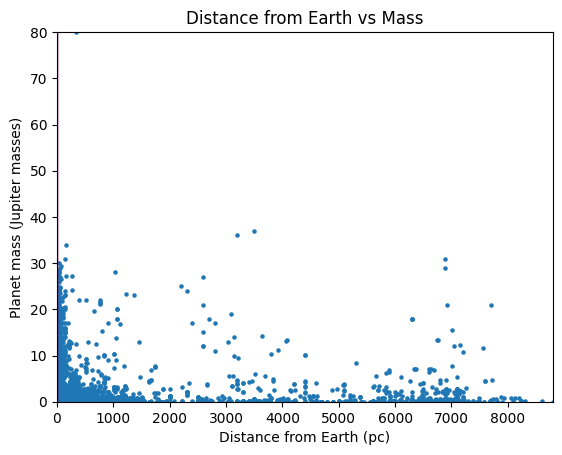

In [2]:
#planet mass (Jupiter mass) vs distance from Earth (pc)
import pandas as pd
import matplotlib.pyplot as plt

#archive = pd.read_csv("NASA_exoplanet_archive_filtered_columns.csv",sep=',',header=58,low_memory=False)
archive=pd.read_csv("NASA_exoplanet_archive_with_proper_motion.csv",sep=',',header=47,low_memory=False)
massj = archive["pl_massj"].astype(float)
distance = archive["sy_dist"].astype(float)

plt.scatter(distance,massj, s=5)
plt.axvspan(xmin = 0, xmax = 25, color='purple', alpha=0.2)
plt.xlim(0,distance.max())
plt.ylim(0,massj.max())
plt.xlabel('Distance from Earth (pc)')
plt.ylabel('Planet mass (Jupiter masses)')
plt.title('Distance from Earth vs Mass')
plt.show()

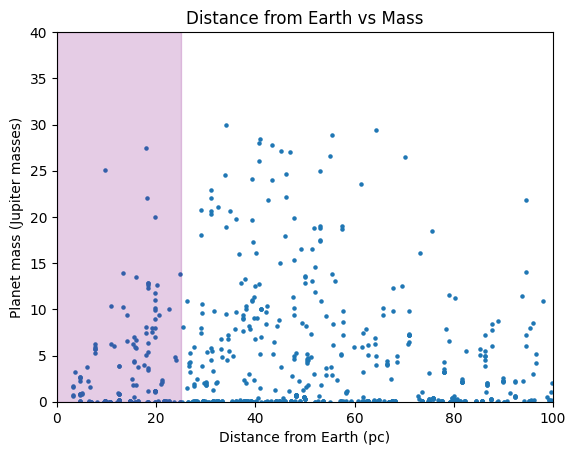

In [2]:
#More zoomed-in version of above:

plt.scatter(distance,massj, s=5)
plt.axvspan(xmin = 0, xmax = 25, color='purple', alpha=0.2)
plt.xlim(0,100)
plt.ylim(0,40)
plt.xlabel('Distance from Earth (pc)')
plt.ylabel('Planet mass (Jupiter masses)')
plt.title('Distance from Earth vs Mass')
plt.show()

Plot indicates wide range of distances from Earth, but with large number of planets very close to Earth. Planet mass skewed towards smaller masses, with one notable outlier with Mass = 80 Jupiter masses. 
NOTE: planet mass is given in Jupiter masses. This is because Hot Jupiters, which are planets with similar mass, orbital radius, etc. to Jupiter are thought to be the most likely to produce radio emission observable/detectable from Earth. So it makes sense to present exoplanet properties relative to those of Jupiter. 

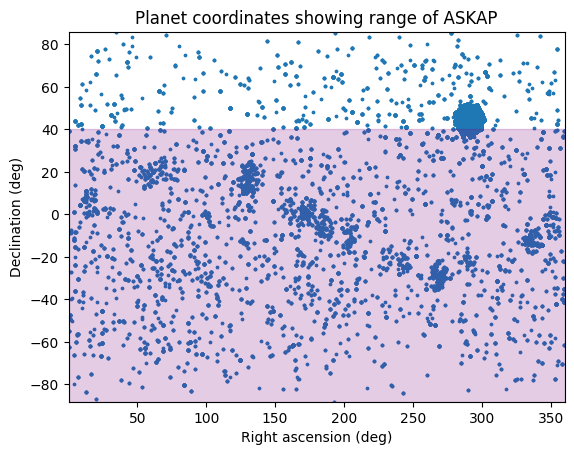

In [3]:
#ra vs dec, with field of view of ASKAP marked in purple 
ra = archive["ra"].astype(float)
dec = archive["dec"].astype(float)

plt.scatter(ra,dec, s=3)
plt.axhspan(ymin=dec.min(), ymax = 40, color='purple', alpha=0.2)
plt.xlim(ra.min(),ra.max())
plt.ylim(dec.min(),dec.max())
plt.xlabel('Right ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Planet coordinates showing range of ASKAP')
plt.show()

NOTE: need to explain 'blobs' and wavy line clusters on this plot in SSP report. 
Explanation: path of Kepler/TESS...

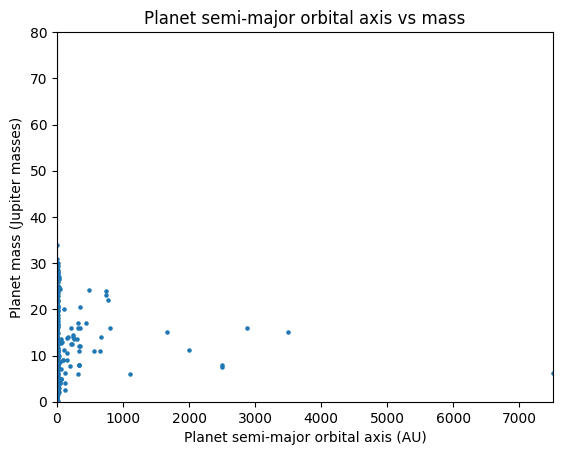

In [4]:
#Planet mass vs semi-major orbital axis 
pl_orbsmax = archive["pl_orbsmax"].astype(float)
massj = archive["pl_massj"].astype(float)

plt.scatter(pl_orbsmax,massj, s = 5)
plt.xlabel('Planet semi-major orbital axis (AU)')
plt.ylabel('Planet mass (Jupiter masses)')
plt.title('Planet semi-major orbital axis vs mass')
plt.xlim(0,pl_orbsmax.max())
plt.ylim(0,massj.max())
plt.axvspan(xmin=0, xmax = 0.1, color='purple', alpha=0.2)
plt.show()

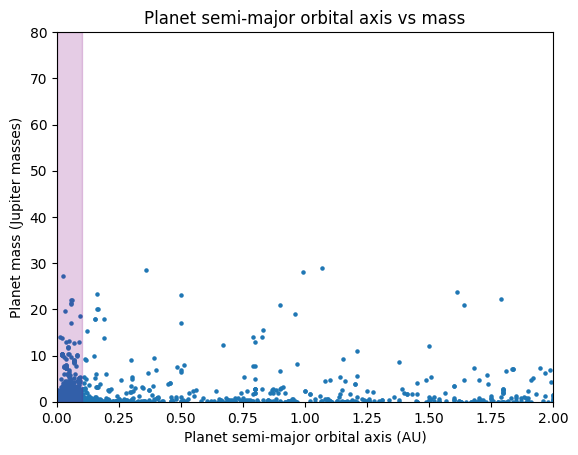

In [5]:
#Zoomed-in version of above 
plt.scatter(pl_orbsmax,massj, s = 5)
plt.xlabel('Planet semi-major orbital axis (AU)')
plt.ylabel('Planet mass (Jupiter masses)')
plt.title('Planet semi-major orbital axis vs mass')
plt.xlim(0,2)
plt.ylim(0,massj.max())
plt.axvspan(xmin=0, xmax = 0.1, color='purple', alpha=0.2)
plt.show()

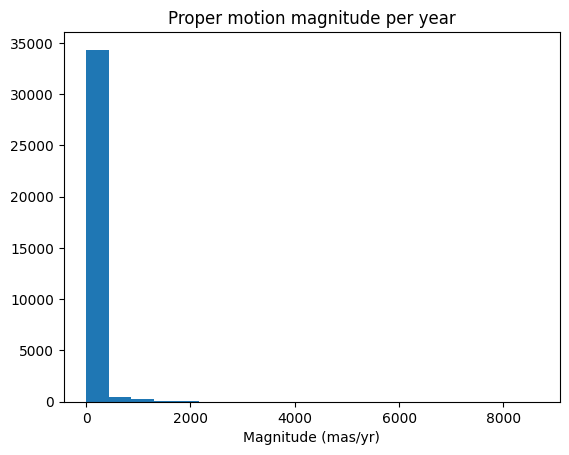

In [10]:
#Proper motion magnitude in milliarcseconds per year
#Note: this is from the nasa archive, and not our calculated final proper motion corrections!

#archive_2 = pd.read_csv("NASA_exoplanet_archive_full.csv",sep=',',header=290,low_memory=False)
#archive_full=pd.read_csv("NASA_exoplanet_archive_with_proper_motion.csv",sep=',',header=47,low_memory=False)


total_pm = archive["sy_pm"].astype(float)

plt.hist(total_pm,bins = 20)
plt.xlabel("Magnitude (mas/yr)")
plt.title('Proper motion magnitude per year')
plt.show()

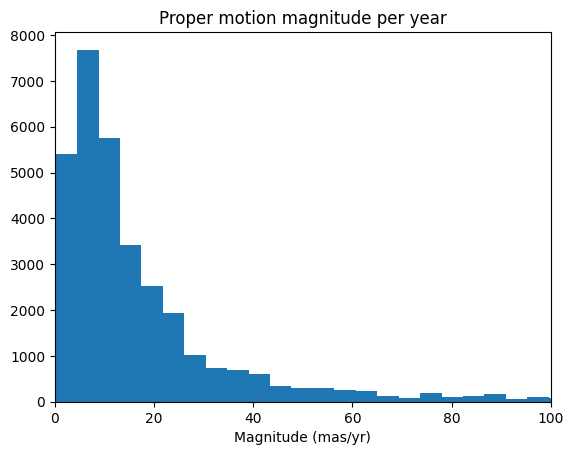

In [11]:
#Zoomed-in version of above 
plt.hist(total_pm,bins = 2000)
plt.xlabel("Magnitude (mas/yr)")
plt.title('Proper motion magnitude per year')
plt.xlim(0,100)
plt.show()

Explaining what this means for SSP report:
- time difference between Gaia DR2 data (where planet ra and dec values come from) and AKSAP observations is < 10 yrs
- positional uncertainty in all ASKAP observation data is ~ 1-2 arcsec 
- any planet with proper motion < 100 mas/yr will have insignificant proper motion correction (~ 1 arcsec total proper motion difference over 10 yrs), which is < ASKAP positional uncertainty 
- however, proper motion correction will be significant for planets with total proper motion > 100 mas/yr since this will be above the uncertainty threshold and will thus be significant 


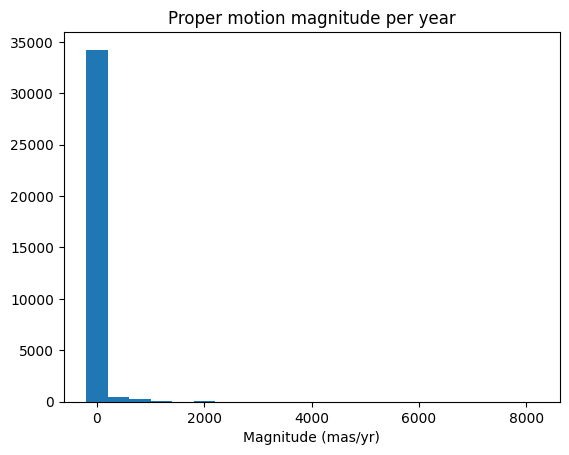

In [6]:
#Same as before but with correct binning. 

import numpy as np

total_pm = archive["sy_pm"].astype(float)
xbins = np.arange(0,total_pm.max(),400)

plt.hist(total_pm,bins = xbins, align = 'left')
plt.xlabel("Magnitude (mas/yr)")
plt.title('Proper motion magnitude per year')
plt.show()

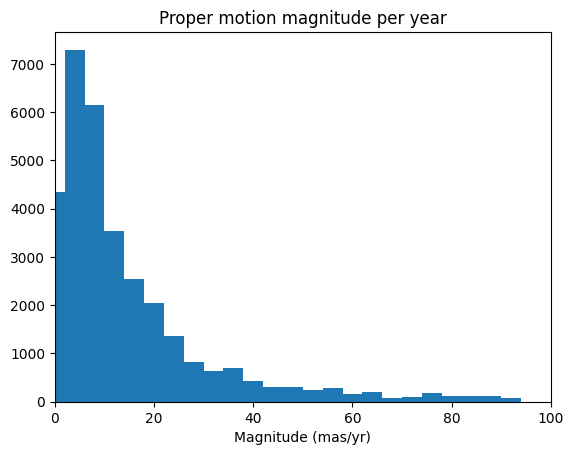

In [16]:
#Zoomed-in version of above 
xbins_zoomed = np.arange(0,100,4)

plt.hist(total_pm,bins = xbins_zoomed, align = 'left')
plt.xlim(0,100)
plt.xlabel("Magnitude (mas/yr)")
plt.title('Proper motion magnitude per year')

plt.show()